# Preparing Data

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
observations = 1000
x = np.random.uniform(-10, 10, (observations,1))
noise = np.random.uniform(-1, 1, (observations,1))

y = x**3 + 3*x**2 + 5*x + 7 + noise

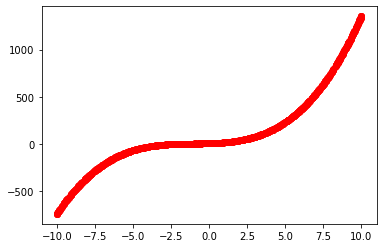

In [63]:
plt.plot(x,y,'ro')
plt.show()

# Preprocessing Data

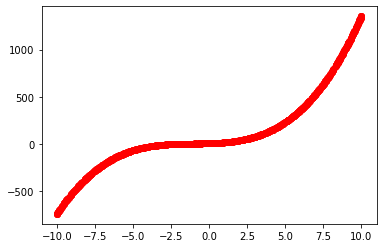

In [64]:
# W and B is get by machine learning
# you can't scale the x and y in this regression example
# scaling usually use in classification with multiple dimension
from sklearn import preprocessing
scaled_inputs = x #preprocessing.scale(x)
scaled_outputs = y #preprocessing.scale(y)

plt.plot(scaled_inputs,scaled_outputs,'ro')
plt.show()

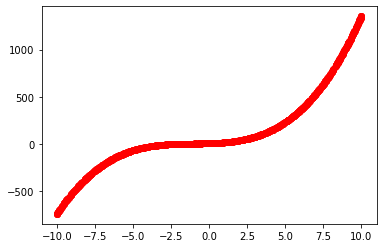

In [65]:
# shuffle the data
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = scaled_outputs[shuffled_indices]

plt.plot(shuffled_inputs,shuffled_targets,'ro')
plt.show()


# Splitting Data


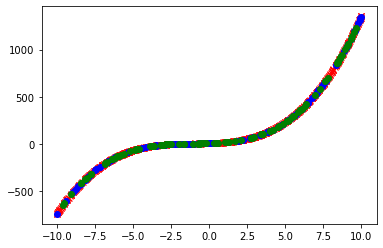

In [66]:
total_samples_count = scaled_inputs.shape[0]
train_samples_count = int(0.8*total_samples_count)
validation_samples_count = int(0.1*total_samples_count)
test_samples_count = total_samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

plt.plot(train_inputs,train_targets,'rx')
plt.plot(validation_inputs, validation_targets, 'bo')
plt.plot(test_inputs, test_targets, 'go')
plt.show()

# Regression Training Model

Epoch 1/100000
8/8 - 0s - loss: 92375.3672 - val_loss: 59981.0195
Epoch 2/100000
8/8 - 0s - loss: 40169.3438 - val_loss: 29661.4766
Epoch 3/100000
8/8 - 0s - loss: 20862.9316 - val_loss: 18393.5391
Epoch 4/100000
8/8 - 0s - loss: 14252.5850 - val_loss: 18705.5312
Epoch 5/100000
8/8 - 0s - loss: 8761.1240 - val_loss: 8123.2651
Epoch 6/100000
8/8 - 0s - loss: 5022.4014 - val_loss: 5412.1357
Epoch 7/100000
8/8 - 0s - loss: 3023.0967 - val_loss: 2728.6375
Epoch 8/100000
8/8 - 0s - loss: 1767.4122 - val_loss: 2538.4231
Epoch 9/100000
8/8 - 0s - loss: 1486.2666 - val_loss: 2505.3384
Epoch 10/100000
8/8 - 0s - loss: 1325.0847 - val_loss: 819.0185
Epoch 11/100000
8/8 - 0s - loss: 733.4056 - val_loss: 834.6931
Epoch 12/100000
8/8 - 0s - loss: 529.0198 - val_loss: 453.9600
Epoch 13/100000
8/8 - 0s - loss: 391.9422 - val_loss: 337.2140
Epoch 14/100000
8/8 - 0s - loss: 274.2875 - val_loss: 510.4871
Epoch 15/100000
8/8 - 0s - loss: 259.0594 - val_loss: 196.2174
Epoch 16/100000
8/8 - 0s - loss: 228.

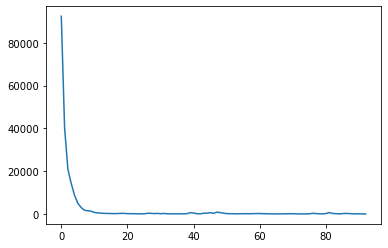

[array([[  7.324377 ],
       [ -6.8401775],
       [  6.9850736],
       [  6.6333504],
       [-11.609012 ],
       [ -3.1753774],
       [  7.086945 ],
       [  0.9661152],
       [-11.149302 ],
       [  5.4117794],
       [  6.7332644],
       [-14.773988 ],
       [ -4.7850175],
       [  6.8494387],
       [ 16.561493 ],
       [  7.022075 ],
       [ -4.273815 ],
       [  7.49301  ],
       [ -1.4660074],
       [  0.7617983]], dtype=float32), array([2.4976153], dtype=float32)]


In [67]:
import tensorflow as tf
input_size = 1
output_size = 1
hidden_layer_size = 20
model_number  = 2

layer0 = tf.keras.layers.Dense(units=hidden_layer_size, activation=tf.keras.activations.relu)
layer1 = tf.keras.layers.Dense(units=1)

# in this model if you just use one layer with signle input, it will give you a big error
# because it will give you a linear model like y=xw+b
# if you add more layers with more hidden layer size it will give you y=x1w1 + x2w2 + ... + xnwn +b
if model_number == 1:
    model = tf.keras.Sequential([layer1])
else:
    model = tf.keras.Sequential([layer0, layer1])

opt1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt2 = tf.keras.optimizers.Adam(1)

# metrics=['accuracy'] should be used in classification but not regression
# because the results of regression is hard to exact match, therefore accuracy always give 0
# for classifcation between cat and dog can give accuracy, because you will only output cat and dog but not something in between
#model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer=opt2)



# https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9
# For Batch Gradient Descent => batch_size = size of training set
# For Stochastic Gradient Descent => Set batch_size=1
# for Mini-batch Gradient Descent => Set 1 < batch_size < size of traing set

# We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

batch_size = 100
max_epochs = 100000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20)

history = model.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size, 
          epochs=max_epochs, 
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 
          )  

plt.plot(history.history['loss'])
plt.show()


weights = layer1.get_weights()
print(weights)


# Prediction


In [69]:
test_loss = model.evaluate(test_inputs, test_targets)
print(test_loss)

# the input for this model x is between -10 to 10
# all the input outside this range will give a big error
# you can try _x beteen -10 to 10; then change it to _x=15
_x = 7
print('Prediction: {}'.format(model.predict([_x])))
_y = _x**3 + 3*_x**2 + 5*_x + 7
print(_y)

4/4 [==============================] - 0s 2ms/step - loss: 107.3401
107.34009552001953
Prediction: [[517.1773]]
532
